# <center>Who Will Win Udemy</center>

### Sources and credits for this project

- https://www.kaggle.com/andrewmvd/udemy-courses
- Dataset author: Willden Chase from Concept Center.
- Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.
- Outliers removing: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
- Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Random decision forests: https://en.wikipedia.org/wiki/Random_forest
- Optimizing parameters: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
- Mean squared error: https://en.wikipedia.org/wiki/Mean_squared_error

## Introduction and Goal definition

This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.
Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.
This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

We can draw immidietly some obvious questions realated to the topic like:

- How much does the number of reviews effect the number of subscribers?
- What courses levels have more courses?
- What course subjects are more popular?
- How long are the different courses?

While those questions are defentliy worth exploring as details and will be explored in this reasearch, in the end we are more intrested in exploring the question that wraps them all - what course will be successful? Or in other words who will win Udemy?

### Workflow stages

1. Prepare and clean the data for work. 
2. Analyze, identify patterns, and explore the data.
3. Division of the records into a training group and a test group.
4. Models training and evaluation.

## 1) Prepare and clean the data for work

In [1]:
# some basic imports that will surely be useful
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv('data/udemy_courses.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Attributes explanation:

- course_id: Unique Ids for course identification.
- course_title: The name of the course.
- url: Course page url.
- is_paid: Paid course or not.
- price: The price of enrolling to the course.
- num_subscribers: The number of people who enrolled to the course already.
- num_reviews: Number of reviews.
- num_lectures: Number of lectures in the course.
- level: What level of prior student knowledge does this course require.
- content_duration: How long in sum is the course lectures.
- published_timestamp: When was the course first published.
- subject: The area of knowledge this course is in.

### Basic Exploratory Of The Data - Quick Look at the Data Structure

We want to check for unneccecery and problamatic columns that might need removal or normalization.

Let's take a basic look about the columns.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


The data is clean from null values, and is conducted from numerical, boolean and object values.

So the columns that can be the most problematic for us are the ones whith Object values:

- course_title: Non-categorial but might have some reccuring patterns that can help us.
- url: Non-categorial and completely individual so not useful in any way.
- level: Categorial.
- published_timestamp: Non-categorial, but might have some reccuring patterns that can help us.
- subject: Categorial.

In [4]:
data['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [5]:
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

We can see that our dataset indeeed contains only the four subject we talked about in the intro, and also we can see that there only four levels of courses with most of them are fitted to all levels / beginners.

In [6]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [7]:
# we cannot histogram the is_paid column so we can already conver it to binary values.
data["is_paid"] = data["is_paid"].astype(int)

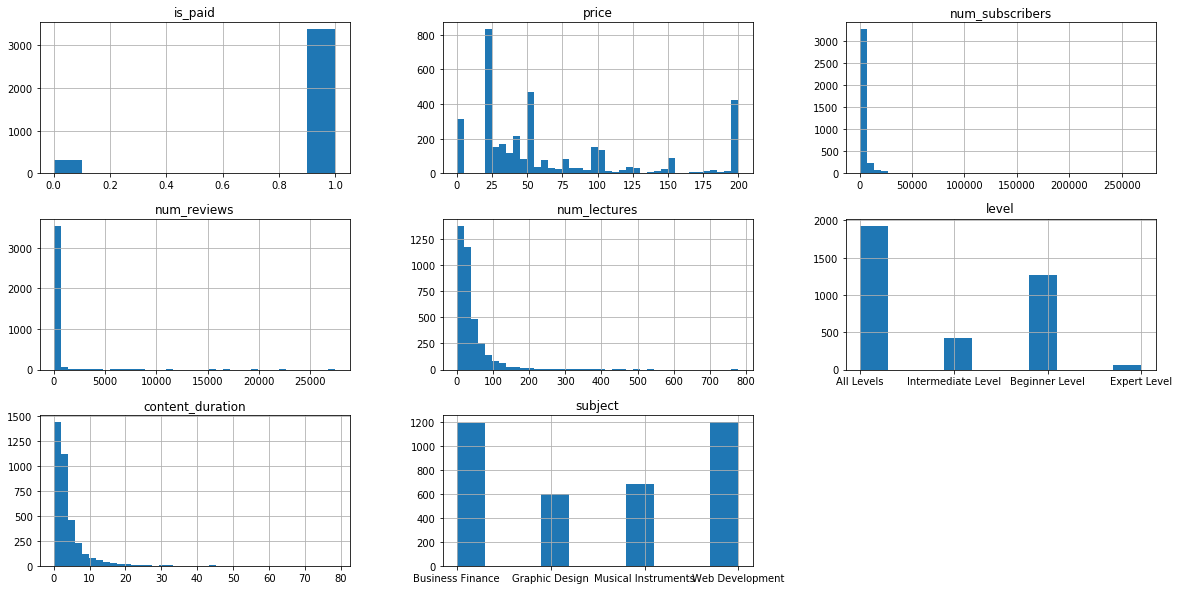

In [8]:
# and for categorial attributes
fig, axs = plt.subplots(3, 3, figsize=(20,10))

data.hist(bins=10, ax=axs[0,0], column='is_paid')
data.hist(bins=40, ax=axs[0,1], column='price')
data.hist(bins=40, ax=axs[0,2], column='num_subscribers')
data.hist(bins=40, ax=axs[1,0], column='num_reviews')
data.hist(bins=40, ax=axs[1,1], column='num_lectures')
data['level'].hist(bins=10, ax=axs[1,2])
axs[1, 2].set_title('level')
data.hist(bins=40, ax=axs[2,0], column='content_duration')
data['subject'].hist(bins=10, ax=axs[2,1])
axs[2, 1].set_title('subject')

fig.delaxes(axs[2, 2])

Describing the data starts reavilling more intresting insights about the numerical features but we will go deeper on that later.

For now, we can notice:

- num_subscribers, num_reviews, num_lectures and content_duration are a bit long-tail and might have outliers.
- A minority of the courses are "mega-successful" with far more reviews and subscribers.
- Most of the courses are aimed to "All-Levels to Beginners". if you are an expert, udemy might not be the place for you.

### Cleaning The Data

I will drop completely useless columns.

In [9]:
# 'og_data' => original data. keeping a copy of the original data.
og_data = data
data.drop(['course_id','course_title','url', 'published_timestamp'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 8 columns):
is_paid             3678 non-null int32
price               3678 non-null int64
num_subscribers     3678 non-null int64
num_reviews         3678 non-null int64
num_lectures        3678 non-null int64
level               3678 non-null object
content_duration    3678 non-null float64
subject             3678 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 215.6+ KB


### Converting Object Columns to Numerical

In [11]:
level_dummies = pd.get_dummies(data['level'], prefix = "level_dummy")
subject_dummies = pd.get_dummies(data['subject'], prefix = "subject_dummy")
data = pd.concat([data, level_dummies, subject_dummies], axis = 1)
data.drop(['level', 'subject'],axis = 1, inplace=True)
data

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,level_dummy_All Levels,level_dummy_Beginner Level,level_dummy_Expert Level,level_dummy_Intermediate Level,subject_dummy_Business Finance,subject_dummy_Graphic Design,subject_dummy_Musical Instruments,subject_dummy_Web Development
0,1,200,2147,23,51,1.5,1,0,0,0,1,0,0,0
1,1,75,2792,923,274,39.0,1,0,0,0,1,0,0,0
2,1,45,2174,74,51,2.5,0,0,0,1,1,0,0,0
3,1,95,2451,11,36,3.0,1,0,0,0,1,0,0,0
4,1,200,1276,45,26,2.0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,1,100,1040,14,21,2.0,1,0,0,0,0,0,0,1
3674,1,25,306,3,42,3.5,0,1,0,0,0,0,0,1
3675,1,40,513,169,48,3.5,1,0,0,0,0,0,0,1
3676,1,50,300,31,38,3.0,1,0,0,0,0,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
is_paid                              3678 non-null int32
price                                3678 non-null int64
num_subscribers                      3678 non-null int64
num_reviews                          3678 non-null int64
num_lectures                         3678 non-null int64
content_duration                     3678 non-null float64
level_dummy_All Levels               3678 non-null uint8
level_dummy_Beginner Level           3678 non-null uint8
level_dummy_Expert Level             3678 non-null uint8
level_dummy_Intermediate Level       3678 non-null uint8
subject_dummy_Business Finance       3678 non-null uint8
subject_dummy_Graphic Design         3678 non-null uint8
subject_dummy_Musical Instruments    3678 non-null uint8
subject_dummy_Web Development        3678 non-null uint8
dtypes: float64(1), int32(1), int64(4), uint8(8)
memory usage: 186.9 KB


## 2) Analyze, identify patterns, and explore the data

Now that we have our data basicly ready to work with, we can examn it more closly to have deeper understanding of the data, analyzing, looking for patterns, corralations and finaly deciding which features are relavent to us and which models to develop.

### Looking for outliers

We can use boxplot to detect pretty easily if there is any outliers in any of our attributes.

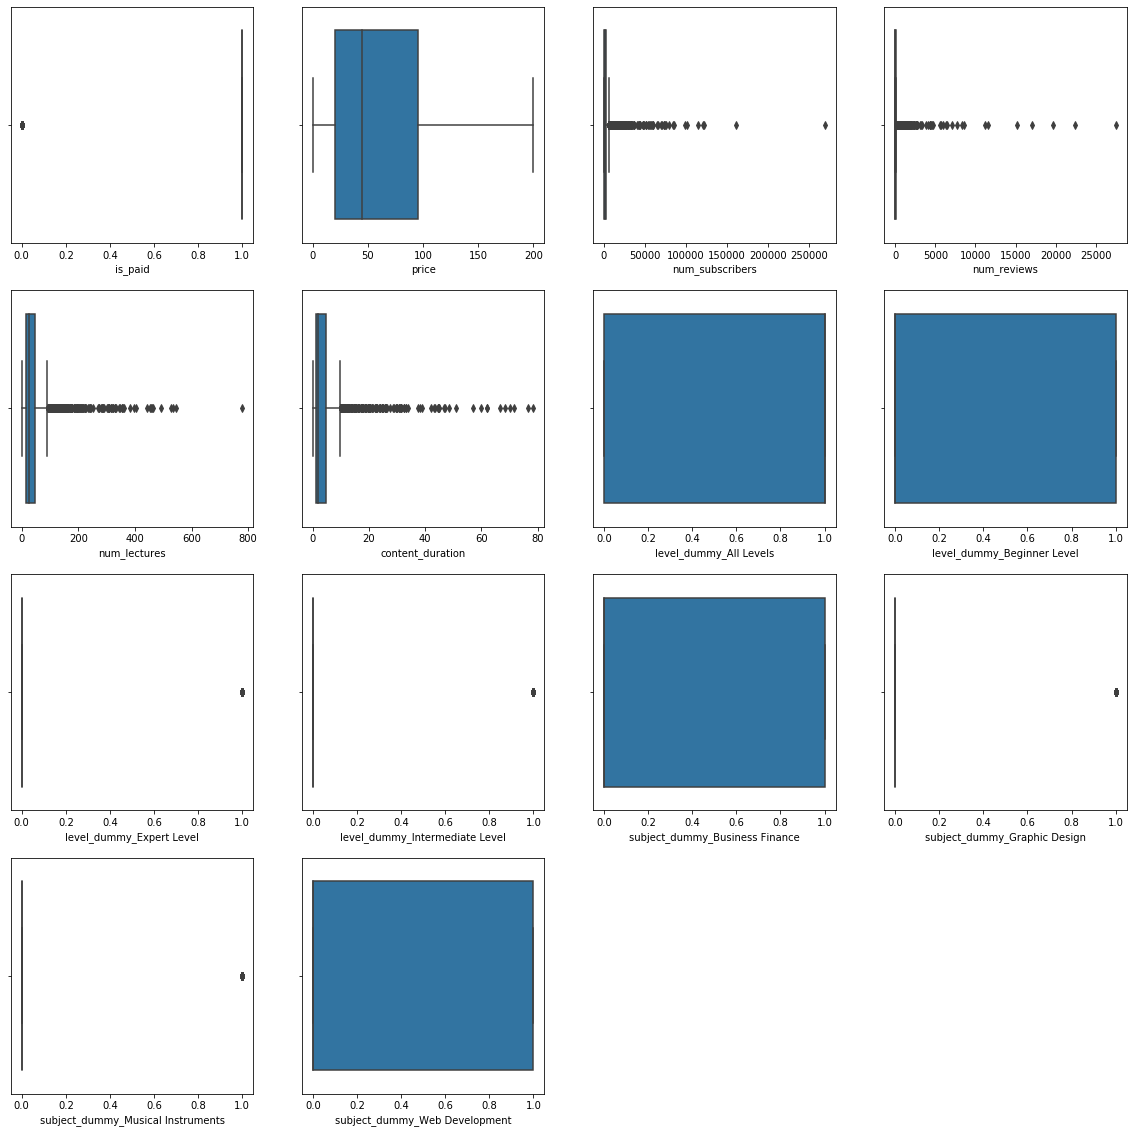

In [13]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in data.columns:
    plt.subplot(a, b, c)
    sns.boxplot(x=data[i])
    c += 1

plt.show()

Let's have a look at some boxplots with exeptions: 
- is_paid: Is binary so we can ignore.
- num_subscribers, num_reviews: As mentioned above it seems there is some "mega-successful" courses' they are defenitly exeptions, but in our particular reasearch we actually want to focus on those extraordinary successful courses!
- num_lectures, content_duration: There is defenitly some exeptional courses that we will take care of.
- level_dummy_Expert Level, level_dummy_Intermediate Level, subject_dummy_Graphic Design, subject_dummy_Musical Instruments: those are all atributes with less popularuty.  

In [14]:
# outliers are the data points that fall outside of 1.5 times 
# of the inter quartile range (Q3 - Q1). 
# So + and - 1.5*IQR means we are considering data within the constraints.

cols = ['num_lectures', 'content_duration']

Q1 = data[cols].quantile(0.05)
Q3 = data[cols].quantile(0.95)
IQR = Q3 - Q1 # 'In Quartile Range'

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
og_data = og_data[~((og_data[cols] < (Q1 - 1.5 * IQR)) |(og_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Features Correlation Matrix

I want to start with a simple correlation matrix to look for noticeable correlation between features, and in particular, between features to the 'num_subscribers' value.

In [15]:
corr = data.corr()
corr.style\
    .background_gradient(cmap='viridis', axis=None)\
    .set_precision(2)\
    .set_caption('Features Correlation Matrix')\

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,level_dummy_All Levels,level_dummy_Beginner Level,level_dummy_Expert Level,level_dummy_Intermediate Level,subject_dummy_Business Finance,subject_dummy_Graphic Design,subject_dummy_Musical Instruments,subject_dummy_Web Development
is_paid,1,0.33,-0.29,-0.14,0.13,0.11,0.077,-0.1,0.039,0.018,0.011,0.043,0.029,-0.069
price,0.33,1,0.02,0.085,0.32,0.3,0.11,-0.12,0.055,-0.021,0.033,-0.054,-0.13,0.12
num_subscribers,-0.29,0.02,1,0.64,0.11,0.13,0.032,0.0099,-0.031,-0.052,-0.12,-0.066,-0.1,0.26
num_reviews,-0.14,0.085,0.64,1,0.19,0.21,0.05,-0.034,-0.018,-0.021,-0.074,-0.049,-0.074,0.17
num_lectures,0.13,0.32,0.11,0.19,1,0.8,0.1,-0.095,-0.02,-0.011,-0.14,-0.061,-0.0076,0.19
content_duration,0.11,0.3,0.13,0.21,0.8,1,0.12,-0.12,-0.023,0.0041,-0.083,-0.043,-0.11,0.21
level_dummy_All Levels,0.077,0.11,0.032,0.05,0.1,0.12,1,-0.76,-0.13,-0.38,0.082,-0.024,-0.11,0.031
level_dummy_Beginner Level,-0.1,-0.12,0.0099,-0.034,-0.095,-0.12,-0.76,1,-0.093,-0.26,-0.09,0.051,0.091,-0.026
level_dummy_Expert Level,0.039,0.055,-0.031,-0.018,-0.02,-0.023,-0.13,-0.093,1,-0.046,0.057,-0.027,-0.021,-0.018
level_dummy_Intermediate Level,0.018,-0.021,-0.052,-0.021,-0.011,0.0041,-0.38,-0.26,-0.046,1,-0.016,-0.029,0.051,-0.0032


To be more specific, we can see the correlation of each attribute to 'num_subscribers', where numbers closer to the edges are what we are looking for. A value close to 1 indicates strong positive correlation, and a value close to -1 indicates strong negative correlation.

In [16]:
corr['num_subscribers'].sort_values(ascending=False)

num_subscribers                      1.000000
num_reviews                          0.636713
subject_dummy_Web Development        0.255432
content_duration                     0.132511
num_lectures                         0.109872
level_dummy_All Levels               0.031734
price                                0.020075
level_dummy_Beginner Level           0.009898
level_dummy_Expert Level            -0.031138
level_dummy_Intermediate Level      -0.052121
subject_dummy_Graphic Design        -0.065829
subject_dummy_Musical Instruments   -0.104852
subject_dummy_Business Finance      -0.115757
is_paid                             -0.289297
Name: num_subscribers, dtype: float64

We can see a very strong correlation to the number of reviews! Let's look closer.

### Number of reviews to number of subscribers

Text(0, 0.5, 'num_reviews')

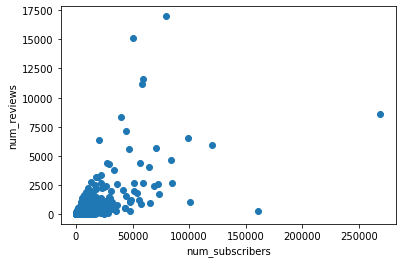

In [17]:
plt.scatter(data.num_subscribers, data.num_reviews)
plt.xlabel('num_subscribers')
plt.ylabel('num_reviews')

It seems that for courses with up to about 140,000 subscribers there is a a strong affect of the number of reviews to how popular the course is.

The qusetion which one causes the other?
If we had access to the timestamp of each course we might could get a clear answer  to that question, but a reasonable guess would be that those attributes probably go hand in hand - a good course leaves a good impression on his subscribers leaving them with a graditude that convert to a review and the course with more validation regarding it's credibility.

### Courses distribution by course level

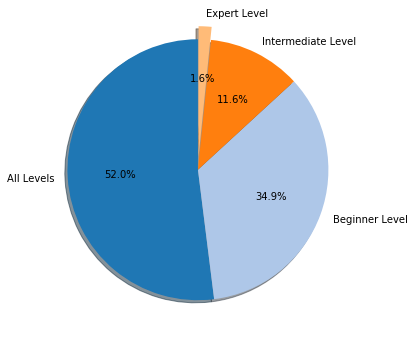

In [18]:
levels_dist = dict(og_data['level'].value_counts(normalize=True))

levels_labels = list(levels_dist.keys())
levels_values = list(levels_dist.values())
levels_explode = (0, 0, 0, 0.1)

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(levels_values, labels=levels_labels, 
        explode=levels_explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.tab20.colors)
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Courses count by course level

([<matplotlib.axis.XTick at 0x2ed5245b1c8>,
 <a list of 4 Text xticklabel objects>)

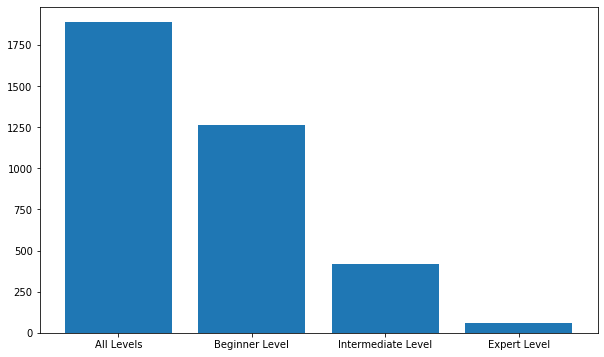

In [19]:
levels_count = dict(og_data['level'].value_counts())

levels_labels = list(levels_count.keys())
levels_values = list(levels_count.values())

bar, ax = plt.subplots(figsize=[10,6])
plt.bar(range(len(levels_count)), levels_values, align='center')
plt.xticks(range(len(levels_count)), levels_labels)

### Courses distribution by course subject

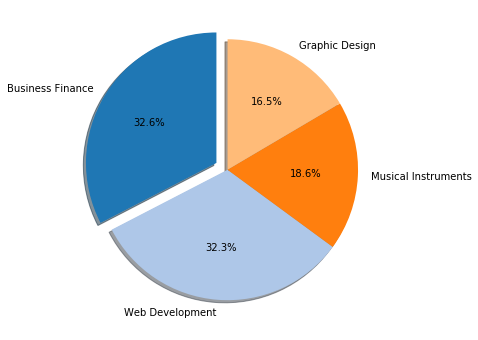

In [20]:
subjects_dist = dict(og_data['subject'].value_counts(normalize=True))

subjects_labels = list(subjects_dist.keys())
subjects_values = list(subjects_dist.values())
subject_explode = (0.1, 0, 0, 0)

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(subjects_values, labels=subjects_labels, 
        explode=subject_explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.tab20.colors)
plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Courses count by course level

([<matplotlib.axis.XTick at 0x2ed524e7608>,
 <a list of 4 Text xticklabel objects>)

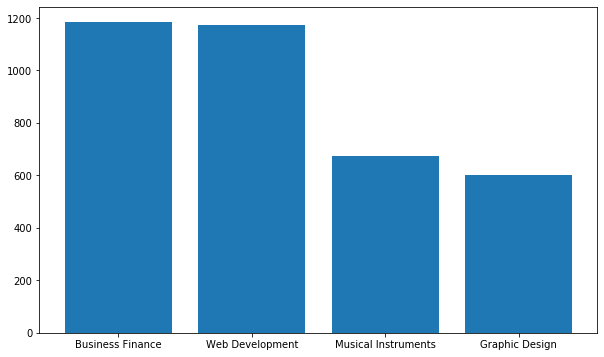

In [21]:
subject_count = dict(og_data['subject'].value_counts())

subject_labels = list(subject_count.keys())
subject_values = list(subject_count.values())


bar, ax = plt.subplots(figsize=[10,6])
plt.bar(range(len(subject_count)), subject_values, align='center')
plt.xticks(range(len(subject_count)), subject_labels)

### Course level to number of lectures

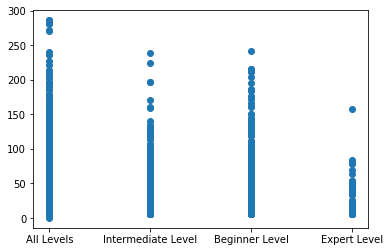

In [22]:
plt.scatter(og_data['level'], og_data['num_lectures'])

### Course level to content duration

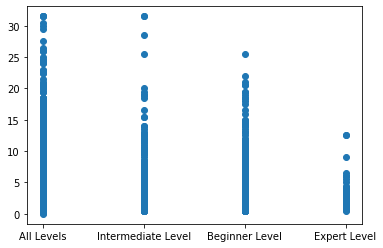

In [23]:
plt.scatter(og_data['level'], og_data['content_duration'])

We can see easily that for expert courses are more focused and use less explainery. Another reason to the results can be that expert courses are less broad and their topics are shorter to teach.

## 3) Division of the records into a training group and a test group

In [24]:
X = data.drop(['num_subscribers'], axis=1)
y = data["num_subscribers"]

### Normalizing the Data

To get better results from our model we can normalize the data.
A good scaler for that would be MinMaxScaler which is known to be sensetive to outliers but because we made sure we do not have outliers we can confidently use it.

In [25]:
from sklearn.preprocessing import MinMaxScaler

X_cols = X.columns
scaler = MinMaxScaler()
norm_X = scaler.fit_transform(X)
norm_X = pd.DataFrame(norm_X, columns=X_cols)
norm_X

,is_paid,price,num_reviews,num_lectures,content_duration,level_dummy_All Levels,level_dummy_Beginner Level,level_dummy_Expert Level,level_dummy_Intermediate Level,subject_dummy_Business Finance,subject_dummy_Graphic Design,subject_dummy_Musical Instruments,subject_dummy_Web Development
0,1.0,1.000,0.001355,0.178322,0.047619,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.225,0.004359,0.178322,0.079365,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.475,0.000648,0.125874,0.095238,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.000,0.002651,0.090909,0.063492,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.750,0.008129,0.087413,0.095238,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,1.0,0.500,0.000825,0.073427,0.063492,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3628,1.0,0.125,0.000177,0.146853,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3629,1.0,0.200,0.009955,0.167832,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3630,1.0,0.250,0.001826,0.132867,0.095238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.20, random_state=0)

print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2905, 13)
y_train shape:  (2905,)
X_test shape:  (727, 13)
y_test shape:  (727,)


## 4) Models training and evaluation.

After exploring the data and getting interesting conclusions we want to let the computer find us the deep connections between the different attributes to the result of a course success.
For that mission we will use a very popular regression algorithm:

Random Forest Regressor:
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [27]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest Regressor Model

In [28]:
# Defining the model with an arrbitery k numbers of 10 estimators and as a starting point:
rf = RandomForestRegressor(n_estimators=10, random_state=1)

# Training:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [29]:
rf_score = rf.score(x_test, y_test)
print(rf_score)

0.49771271425378805


Our score is about 85.75% and that is a much better score but we want to get a more acurate score using different splits of the data.

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new RF model
rf_cv = RandomForestRegressor(n_estimators=10, random_state=1)
#train model with cv of 5 
rf_cv_scores = cross_val_score(rf_cv, norm_X, y, cv=5)
#print each cv score (accuracy) and average them
print(rf_cv_scores)
print(f'cv_scoremean:{np.mean(rf_cv_scores)}')

[ 0.37528971  0.60226125  0.43578393  0.41904455 -0.78692773]
cv_scoremean:0.20909034050396585


Using cross-validation, our mean score is about 85.34%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the RF method.

Our initial RF model parameter ‘n_estimators’ was set to 10 just as an arrbitary starting point.
To find the optimal parameters for our model and to improve accuracy, we will use GridSearchCV to find the optimal value for ‘n_estimators’.
For our model, we will specify a range of values for ‘n_estimators’ in order to see which value works best for our model.

In [31]:
from sklearn.model_selection import GridSearchCV

#create new a RF model
rf_grid = RandomForestRegressor()
#create a dictionary of all values we want to test for n_estimators
param_grid = {'n_estimators': np.arange(10, 100)}
#use gridsearch to test all values for n_estimators
rf_gscv = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5)
#fit model to data
rf_gscv.fit(norm_X, y)

C:\Users\elior\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3

In [32]:
#check top performing n_estimators value
rf_gscv.best_params_

{'n_estimators': 38}

In [33]:
# Defining the model with the optimized number of # estimators:
rf_opt = RandomForestRegressor(n_estimators=13, random_state=1)

# Training:
rf_opt.fit(x_train, y_train)

# Predicting:
y_pred2 = rf_opt.predict(x_test)

In [34]:
rf_opt_score = rf_opt.score(x_test, y_test)
print(rf_opt_score)

0.488951256728295


Using Grid Search Cross Vavlidation we found our optimized RF model parameters and an acurrate score of 48.89%.

### Evaluating the model

To be honest, even though we did our best to evalute the success of a course we still are far from the true and it's easy to see when looking at the low score.

At the beginning the dataset looked promising by the features it presents but by the end of the research we have to get to the conclusion that at this case, we are missing more information to get a better evaluation of a course success.

Some feature suggestion that might have helped:

- More subjects
- Course rating
- Tutor expirience
- Students demography
- Students location